# Analyse the *Text* column in the test data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
gap_df = pd.read_csv('data/raw/gap-coreference/gap-test.tsv', sep='\t')

In [3]:
gap_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner
1,test-2,"Between the years 1979-1981, River won four lo...",him,430,Alonso,353,True,Alfredo Di St*fano,390,False,http://en.wikipedia.org/wiki/Norberto_Alonso
2,test-3,Though his emigration from the country has aff...,He,312,Ali Aladhadh,256,True,Saddam,295,False,http://en.wikipedia.org/wiki/Aladhadh
3,test-4,"At the trial, Pisciotta said: ``Those who have...",his,526,Alliata,377,False,Pisciotta,536,True,http://en.wikipedia.org/wiki/Gaspare_Pisciotta
4,test-5,It is about a pair of United States Navy shore...,his,406,Eddie,421,True,Rock Reilly,559,False,http://en.wikipedia.org/wiki/Chasers


### Text length

In [10]:
gap_df['Text-len'] = gap_df['Text'].map(lambda x: len(x))

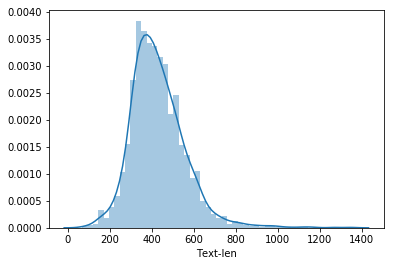

In [11]:
sns.distplot(gap_df['Text-len'])

In [12]:
gap_df['Text-len'].min()

69

In [13]:
gap_df['Text-len'].max()

1347

### Word count

In [8]:
gap_df['Text-word-count'] = gap_df['Text'].map(lambda x: len(x.split(' ')))

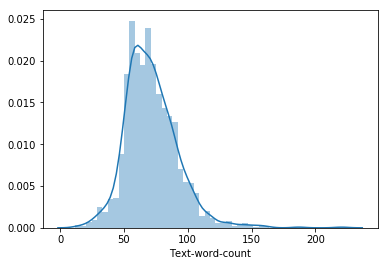

In [9]:
sns.distplot(gap_df['Text-word-count'])

In [14]:
gap_df['Text-word-count'].min()

12

In [15]:
gap_df['Text-word-count'].max()

223

### Offset differences
Name and pronoun offset differences in characters

In [16]:
gap_df['A-offset-diff'] = gap_df['Pronoun-offset'] - gap_df['A-offset']

In [18]:
gap_df['B-offset-diff'] = gap_df['Pronoun-offset'] - gap_df['B-offset']

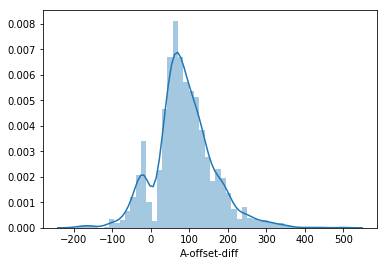

In [17]:
sns.distplot(gap_df['A-offset-diff'])

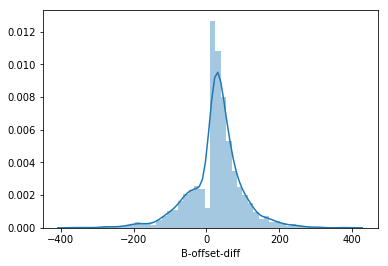

In [19]:
sns.distplot(gap_df['B-offset-diff'])

Negative differences (the pronoun appears before the name) are not too rare. An example for a negative difference would be: "A day before **his** discharge, **Eddie** is assigned to escort a prisoner [...]"